# Projet MathF-314 : Partie Informatique                                              2019/2020
### Hajjaj Zakariae , Onur Yavas
### 000439743  ,   000424929
## Introduction :

Un sujet important en mécanique des fluides est l'étude de la stabilité des écoulements. De manière générale, on se donne un champ de vitesse du fluide laminaire U et on étudie son évolution lorsqu'on lui ajoute des "petites" perturbations. Si ces perturbations décroissent systématiquement au cours du temps, l'écoulement sera dit **stable**. Dans le cas contraire, l'écoulement pourrait être instable et se transformer en un écoulement **turbulent**.

## Travail personnel :
On commence par introduire les modules python que nous utiliserons et on rajoute nos données de base :

In [3]:
from math import *
import numpy as np
from numpy.linalg import inv
import scipy
from scipy import linalg
from matplotlib import pyplot as plt
import random
N=101
L=1.0
y=np.linspace(-L,L,N)
dy=2*L/(N-1)

## Question 1 :
Pour $ \widehat{\nu'}$, le problème contient 4 conditions aux bords. Les conditions du type Dirichlet se traduisent par: v[0]=0 et v[N-1]=0.
On détermine comment se traduisent les conditions du type von Neumann $\frac{\partial \nu}{\partial y}$(y=1) = $\frac{\partial \nu}{\partial y}$(y=-1)=0 si on adopte une "forward finite difference" du second ordre pour la dérivée première sur le bord  et une "backward finite difference" du second ordre pour la dérivée première sur le bord .

De la question précédente, on déduit que la discrétisation de $\widehat{\nu'} $ ne contient que $ N-4$ valeurs indépendantes et qu'on peut dès lors définir numériquement.

Pour notre condition $\frac{\partial \nu}{\partial y}$(y=-1)=0 en forward infinite difference , on a :

$f'(x_{0})$ = $ \frac{-3/2 f(x_{0}) + 2f(x_{1}) - 1/2 f(x_{2})}{dy} $

et pour notre condition $\frac{\partial \nu}{\partial y}$(y=1)=0 en backward infinite difference , on a :

$f'(x_{0})$ = $ \frac{1/2 f(x_{-2}) - 2f(x_{-1}) + 3/2 f(x_{0})}{dy} $

Après calcul en remplaçant la fonction par $ \nu'$ , on se retrouve avec les conditions suivantes :
$ \nu'(1) = 1/4 \nu'(2) $ et $ \nu'(N-2) = 1/4  \nu'(N-3) $


On déduit,du coup ,que la discrétisation de $\nu' $ ne contient que $ N-4$ valeurs indépendantes et qu'on peut dès lors définir numériquement.

In [4]:
v=np.empty(N-4)

## Question 2 :
On compléte la routine suivante afin qu'elle retourne une discrétisation de l'opérateur $ D^{2} $ du type "central finite difference" valable à l'ordre 2 et qui agit sur les valeurs indépendantes de $ \nu'$ :

In [5]:
def D2_v(N,dy):
    D2 = np.zeros((N-4,N-4))    # matrice N-4 x N-4
    for i in range(N-4):
        if i == 0:
            D2[0,0]=-(7/4)/(dy**2)   # les coefficients sont obtenu a partir de la central difference avec nos conditons au bord de von neumon et dirichlet 
            D2[0,1]=1/(dy**2)        # On fait attention au début et à la fin pour utiliser nos conditions de bords
        elif i == N-5:
            D2[N-5,N-5]=-(7/4)/(dy**2)
            D2[N-5,N-6]=1/(dy**2)
        else:
            D2[i,i]=-2/(dy**2)
            D2[i,i+1]=1/(dy**2)
            D2[i,i-1]=1/(dy**2)
    return D2

## Question 3 :
On fait de même pour l'opérateur de dérivée 4ème, $ D^{4} = \frac{\partial^4 }{\partial y} $ en complétant la routine suivante afin qu'elle retourne une discrétisation de l'opérateur  du type "central finite difference" valable à l'ordre 2 et qui agit sur les valeurs indépendantes de $ \nu'(y)$ :

In [6]:
def D4_v(N,dy):
    D4 = np.zeros((N-4,N-4))
    for i in range(N-4):
        if i == 0:
            D4[0,0]=5/(dy**4)
            D4[0,1]=-4/(dy**4)         # Les coefficients sont aussi donné par la methode central finite difference
            D4[0,2]=1/(dy**4)      
        elif i == 1:
            D4[1,0]=(-4+1/4)/(dy**4)
            D4[1,1]=6/(dy**4)
            D4[1,2]=-4/(dy**4)
            D4[1,3]=1/(dy**4)
        elif i == N-6:
            D4[N-6,N-6]=6/(dy**4)
            D4[N-6,N-7]=-4/(dy**4)
            D4[N-6,N-8]=1/(dy**4)                  # cette fois ci on fait attention à 2 fois car on prend des 2 éléments avant et après.      
            D4[N-6,N-5]=(-4+1/4)/(dy**4)
        elif i == N-5:
            D4[N-5,N-5]=5/(dy**4)
            D4[N-5,N-6]=-4/(dy**4)
            D4[N-5,N-7]=1/(dy**4)            
        else:
            D4[i,i]=6/(dy**4)
            D4[i,i-1]=-4/(dy**4)
            D4[i,i-2]=1/(dy**4)                        
            D4[i,i+1]=-4/(dy**4)
            D4[i,i+2]=1/(dy**4)
    return D4

## Question 4 :
On construis une routine qui permet de construire l'opérateur $ L $

In [7]:
def L_v(N,y,dy,R,a):
   U = np.matrix(np.zeros((N-4,N-4))) 
   for i in range(N-4): 
    U[i,i]=(1-((y[i+2])**2)) 
   Us=np.matrix((-2)*np.identity(N-4))
   D2=np.matrix(D2_v(N,dy))
   D4=np.matrix(D4_v(N,dy))
   A = np.matrix(a * np.identity(N-4))
   L = inv(np.matrix(D2-1*A**2))*(-1j*a*(U)*(D2-A**2)+1j*a*(Us)+1/R*(D4-2*(A**2)*D2+A**4))
   return L

## Question 5 :
On utilise l' algortihme RK4 dans le temps (https://en.wikipedia.org/wiki/Runge–Kutta_methods#The_Runge–Kutta_method) et un pas de temps de $ dt=0.01 $ . On calcule la valeur de $ \nu'$ en $ y = 0.5$ pour un temps final de $ 10s $ à partir de la condition initiale suivante :
                $ \nu'(y) = 0.02 * (1+cos( \pi y )) $

On choisit commme paramêtres $ R = 500 $ et $ \alpha = 0.3 $ 

Solution: $ \nu'(0.5)$= 0.00772852 - 0.1239437i

In [8]:
def v_0(y):                                 #On définit notre v(y) donné par l'énoncé 
    v= np.zeros((N-4,1))
    i=0
    while i < N-4:
        v2 = 0.02*(1+cos(pi*y[i+2]))
        v[i]=v2
        i= i +1
    return v
def R_K(N,y,dy,R,a,v0,h):                    # On applique Runge-kutta 
    v=v0
    for i in range(1000):
        k1 = h*L_v(N,y,dy,R,a)*(v)
        v_k1 = np.add(v,0.5*k1)
        k2 = h*L_v(N,y,dy,R,a)*(v_k1)
        v_k2 = np.add(v,0.5*k2)
        k3 = h*L_v(N,y,dy,R,a)*(v_k2)
        v_k3 = np.add(v,k3)
        k4 = h*L_v(N,y,dy,R,a)*(v_k3)
        k2_2 = 2*k2
        k3_2 = 2*k3
        k3_k4 = np.add(k3_2,k4)
        k1_k2 = np.add(k1,k2_2)
        K = 1/6*np.add(k1_k2,k3_k4)
        v = np.add(v,K)
    return v                                   #On aura tout les valeurs de v(y) pour toute les valeurs de y défini avant la question 1
v0 = v_0(y)
R=500
a=0.3
h = 0.01
res = R_K(N,y,dy,R,a,v0,h)
print(res[-24])                             # On prend l'emplacement où y=0.5 dans le vecteur y défini avant la question 1, et cet emplacement est y[-24]=0.5

[[0.00772852-0.01239437j]]


## Question 6 :
On calcule le propagateur $ X $  à l'instant $ t = 10$ pour les mêmes valeurs des paramètres ( $ R $ et $ \alpha $ ). On utilise à nouveau l' algorithme RK4 dans le temps et un pas de temps $ dt = 0.01$.

In [9]:
x0 = np.matrix(np.identity(N-4))    # X(0) est défini comme la matrice identité
res_X= R_K(N,y,dy,R,a,x0,h)
print(res_X)

[[-0.0016916 +0.00087957j -0.00096121+0.00073356j -0.00072181+0.00076221j
  ... -0.00051373-0.00031961j -0.00052634-0.00046955j
  -0.00073908-0.0009299j ]
 [-0.00379288+0.00192498j -0.00216   +0.0016166j  -0.00162786+0.00168694j
  ... -0.00113195-0.00070122j -0.00116109-0.00103203j
  -0.00163295-0.00204778j]
 [-0.00668547+0.00329612j -0.00381687+0.00279289j -0.00288859+0.00293051j
  ... -0.00196107-0.00120501j -0.00201508-0.0017784j
  -0.00284077-0.00353835j]
 ...
 [-0.00284077-0.00353835j -0.00201508-0.0017784j  -0.00196107-0.00120501j
  ... -0.00288859+0.00293051j -0.00381687+0.00279289j
  -0.00668547+0.00329612j]
 [-0.00163295-0.00204778j -0.00116109-0.00103203j -0.00113195-0.00070122j
  ... -0.00162786+0.00168694j -0.00216   +0.0016166j
  -0.00379288+0.00192498j]
 [-0.00073908-0.0009299j  -0.00052634-0.00046955j -0.00051373-0.00031961j
  ... -0.00072181+0.00076221j -0.00096121+0.00073356j
  -0.0016916 +0.00087957j]]


## Question 7 :
On vérifie que le propagateur transforme bien la condition initiale de la question 5 en la solution qu'on a obtenue.

In [10]:
res_v = res_X*v0
Q=res_v - res                           # on soustrait les 2 résultat pour voir que nous avons bien l'égalité
print(Q)          

[[-1.35525272e-19+4.06575815e-20j]
 [-2.16840434e-19+8.13151629e-20j]
 [-4.87890978e-19+2.16840434e-19j]
 [-8.67361738e-19+3.25260652e-19j]
 [-1.19262239e-18+3.25260652e-19j]
 [-1.73472348e-18+8.67361738e-19j]
 [-2.38524478e-18+4.33680869e-19j]
 [-2.60208521e-18+4.33680869e-19j]
 [-3.03576608e-18-4.33680869e-19j]
 [-3.46944695e-18+8.67361738e-19j]
 [-4.33680869e-18-4.33680869e-19j]
 [-5.63785130e-18+0.00000000e+00j]
 [-6.93889390e-18+1.73472348e-18j]
 [-7.80625564e-18+1.73472348e-18j]
 [-8.67361738e-18+0.00000000e+00j]
 [-6.93889390e-18+0.00000000e+00j]
 [-7.80625564e-18-1.73472348e-18j]
 [-9.54097912e-18+2.60208521e-18j]
 [-1.04083409e-17-3.46944695e-18j]
 [-6.93889390e-18+0.00000000e+00j]
 [-6.93889390e-18+3.46944695e-18j]
 [-9.54097912e-18+3.46944695e-18j]
 [-1.12757026e-17-3.46944695e-18j]
 [-9.54097912e-18+1.73472348e-18j]
 [-1.04083409e-17-6.93889390e-18j]
 [-1.04083409e-17-1.04083409e-17j]
 [-1.38777878e-17-1.21430643e-17j]
 [-1.38777878e-17-2.42861287e-17j]
 [-1.21430643e-17-1.

**On a des termes exposant -17,-18,... donc très très proche de 0** 

## Question 8 : 
On utilise la fonction disponible dans numpy pour effectuer la décomposition singulière du propagateur obtenu à la question 7 et on calcule la plus grande des valeurs singulières. On fait un graphique de la perturbation optimale correspondante (elle correspond au vecteur d'entrée associé à cette plus grande valeur singulière).

Solution: s=3.3042383

3.3042383414767778


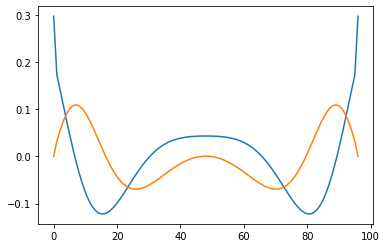

In [11]:
u,s,vh = np.linalg.svd(res_X)                # la fonction numpy qui effectue la décomposition singulière

max_s = s[0]
print(max_s)                                # la valeur qu'on cherche
input_v = np.transpose(np.conj(vh))
opt_perturbation = input_v[:,0]
Re=plt.plot(opt_perturbation.real)
Im=plt.plot(opt_perturbation.imag)                 # on plot le graphique de la perturbation
plt.show(Re)
plt.show(Im)

**En bleu nous avons les termes Réelles de opt_perturbation et en orange nous avons les termes Complexes de opt_pertubation**

## Question 9 :
En faisant varier $\alpha$ comme paramètre dans le propagateur,on écrit un programme qui permet de déterminer la valeur de $\alpha$ qui maximise l'amplification des perturbations à l'instant  $t=10$ (toujours avec le même $R$ ) et en utilisant la même résolution et méthode numérique que précédemment. On fait aussi un graphique de $s$ en fonction de $\alpha$.
On résout cette exercice par graphique,i.e on regarde le maximum dans notre graphique ( le sommet ici ).
Donc ici on est au alentour de la position : (1.5,10)

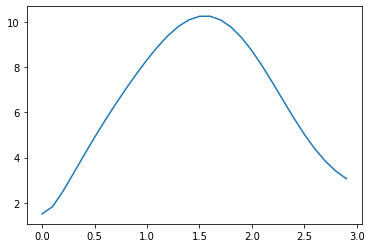

In [13]:
a = 0
s_l = np.array([])          
a_l = np.array([])
while a < 3:
    a_l = np.append(a_l,a)
    X = R_K(N,y,dy,R,a,x0,h) 
    u,s,vh = np.linalg.svd(X)
    s_l = np.append(s_l,s[0])
    a= a + 0.1
plt.plot(a_l, s_l)      
plt.show()

## Bibliographie :
https://en.wikipedia.org/wiki/Finite_difference_coefficient
https://en.wikipedia.org/wiki/Runge–Kutta_methods
https://nbviewer.jupyter.org/github/numerical-mooc/numerical-mooc/blob/master/lessons/02_spacetime/02_03_1DDiffusion.ipynb